<a href="https://colab.research.google.com/github/k4ilham/collab/blob/main/AnalisisSentimenCapres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv("https://raw.githubusercontent.com/k4ilham/collab/main/sentimen_analisis/capres/dataset/prabowo.csv")
# df.head()


In [3]:
# Testing hanya mengambil 50 row data
df = pd.read_csv("https://raw.githubusercontent.com/k4ilham/collab/main/sentimen_analisis/capres/dataset/prabowo.csv",nrows=50)
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:10:46 +0000 2023,1735512698522382615,"@andre_rosiade eh botak, bilang ke capres lu d...",0,0,0,0,in,1718575798792355840,1735204525517177333,Yhafidzun15,https://twitter.com/Yhafidzun15/status/1735512...
1,1,Fri Dec 15 04:10:46 +0000 2023,1735512698086166538,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",0,0,0,0,in,1101762919,1735512698086166538,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126980...
2,2,Fri Dec 15 04:10:43 +0000 2023,1735512687281573985,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",0,0,0,0,in,1101762919,1735512687281573985,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126872...
3,3,Fri Dec 15 04:10:41 +0000 2023,1735512676552597739,@kurawa jokowi hebat....setuju tapi melihat pe...,0,0,0,0,in,1069905602,1735205387757146512,romobing,https://twitter.com/romobing/status/1735512676...
4,4,Fri Dec 15 04:10:38 +0000 2023,1735512663923490883,Prabowo prediksi AHY akan jadi pemimpin di tin...,0,0,0,0,in,1101762919,1735512663923490883,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126639...


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'created_at', 'id_str', 'full_text', 'quote_count',
       'reply_count', 'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')


In [5]:
df = df[['full_text','username','created_at']]
df

,full_text,username,created_at
0,"@andre_rosiade eh botak, bilang ke capres lu d...",Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,@kurawa jokowi hebat....setuju tapi melihat pe...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,Prabowo prediksi AHY akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
5,"@yuliaaanidiya_ Acara hari ini seru banget, Pr...",ZahariTasya,Fri Dec 15 04:10:35 +0000 2023
6,@gibran_gen @gibran_tweet @prabowo warga Indon...,Ratu_0509,Fri Dec 15 04:10:34 +0000 2023
7,Demokrat Sumsel siap menangkan pasangan Prabow...,Iza_Zot,Fri Dec 15 04:10:33 +0000 2023
8,Emang parah dan menjijikan sih pembunuhan kara...,OliviaCath1540,Fri Dec 15 04:10:32 +0000 2023
9,@yuliaaanidiya_ Ketua Tim Komunikasi TKN Prabo...,hyunaindira,Fri Dec 15 04:10:32 +0000 2023


#Cleaning Data

##View the number of rows and columns

In [6]:
df.shape

(50, 3)

##Delete duplicate data

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.drop_duplicates(subset=['full_text'])

In [9]:
df.duplicated().sum()

0

##Remove empty values

In [10]:
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [13]:
df.shape

(50, 3)

## Data cleaning process

In [14]:
df

,full_text,username,created_at
0,"@andre_rosiade eh botak, bilang ke capres lu d...",Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,@kurawa jokowi hebat....setuju tapi melihat pe...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,Prabowo prediksi AHY akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
5,"@yuliaaanidiya_ Acara hari ini seru banget, Pr...",ZahariTasya,Fri Dec 15 04:10:35 +0000 2023
6,@gibran_gen @gibran_tweet @prabowo warga Indon...,Ratu_0509,Fri Dec 15 04:10:34 +0000 2023
7,Demokrat Sumsel siap menangkan pasangan Prabow...,Iza_Zot,Fri Dec 15 04:10:33 +0000 2023
8,Emang parah dan menjijikan sih pembunuhan kara...,OliviaCath1540,Fri Dec 15 04:10:32 +0000 2023
9,@yuliaaanidiya_ Ketua Tim Komunikasi TKN Prabo...,hyunaindira,Fri Dec 15 04:10:32 +0000 2023


In [15]:
def clean_twitter_text(text):
  # Menghapus mention (@username)
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Menambahkan + untuk menghapus seluruh username, bukan hanya karakter pertama

  # Menghapus hashtag (#hashtag)
  text = re.sub(r'#\w+', '', text)

  # Menghapus retweet (RT diikuti spasi)
  text = re.sub(r'RT[\s]+', '', text)

  # Menghapus URL (http atau https diikuti karakter non-spasi)
  text = re.sub(r'https?://\S+', '', text)

  # Menghapus karakter non-alfanumerik kecuali spasi
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)

  # Menghapus spasi tambahan di dalam teks (mengganti beberapa spasi dengan satu spasi)
  text = re.sub(r'\s+', ' ', text).strip()  # Menggunakan spasi tunggal di sini dan menambahkan strip() untuk menghapus spasi di awal/akhir

  return text


In [16]:
df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [17]:
df

,full_text,username,created_at
0,eh botak bilang ke capres lu dulu dia ngobrol ...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,Elektabilitas tembus 45 persen AHY Prabowo bis...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,Beri pujian ke AHY Prabowo Pemimpin yang hebat...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju tapi melihat penampilan pra...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,Prabowo prediksi AHY akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
5,Acara hari ini seru banget Prabowo SBY Djoko S...,ZahariTasya,Fri Dec 15 04:10:35 +0000 2023
6,warga Indonesia butuh sosok pemimpin yang sepe...,Ratu_0509,Fri Dec 15 04:10:34 +0000 2023
7,Demokrat Sumsel siap menangkan pasangan Prabow...,Iza_Zot,Fri Dec 15 04:10:33 +0000 2023
8,Emang parah dan menjijikan sih pembunuhan kara...,OliviaCath1540,Fri Dec 15 04:10:32 +0000 2023
9,Ketua Tim Komunikasi TKN PrabowoGibran Budisat...,hyunaindira,Fri Dec 15 04:10:32 +0000 2023


## Convert words to lowercase

In [18]:
df['full_text'] = df['full_text'].str.lower()

In [19]:
df

,full_text,username,created_at
0,eh botak bilang ke capres lu dulu dia ngobrol ...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,elektabilitas tembus 45 persen ahy prabowo bis...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,beri pujian ke ahy prabowo pemimpin yang hebat...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju tapi melihat penampilan pra...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,prabowo prediksi ahy akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
5,acara hari ini seru banget prabowo sby djoko s...,ZahariTasya,Fri Dec 15 04:10:35 +0000 2023
6,warga indonesia butuh sosok pemimpin yang sepe...,Ratu_0509,Fri Dec 15 04:10:34 +0000 2023
7,demokrat sumsel siap menangkan pasangan prabow...,Iza_Zot,Fri Dec 15 04:10:33 +0000 2023
8,emang parah dan menjijikan sih pembunuhan kara...,OliviaCath1540,Fri Dec 15 04:10:32 +0000 2023
9,ketua tim komunikasi tkn prabowogibran budisat...,hyunaindira,Fri Dec 15 04:10:32 +0000 2023


#Preprocesing

##Normalisasi

In [20]:
norm = {" yg ": " yang ", " ganjar ": " ", " prabowo ": " ", " nggak ": " tidak ", " bangetdari ": " banget dari ", " vibes ": " suasana ", " mantab ": " keren "}

In [21]:
def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

In [22]:
df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))

In [23]:
df

,full_text,username,created_at
0,eh botak bilang ke capres lu dulu dia ngobrol ...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,elektabilitas tembus 45 persen ahy bisa menang...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,beri pujian ke ahy pemimpin yang hebat untuk b...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju tapi melihat penampilan di ...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,prabowo prediksi ahy akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
5,acara hari ini seru banget sby djoko suyanto d...,ZahariTasya,Fri Dec 15 04:10:35 +0000 2023
6,warga indonesia butuh sosok pemimpin yang sepe...,Ratu_0509,Fri Dec 15 04:10:34 +0000 2023
7,demokrat sumsel siap menangkan pasangan prabow...,Iza_Zot,Fri Dec 15 04:10:33 +0000 2023
8,emang parah dan menjijikan sih pembunuhan kara...,OliviaCath1540,Fri Dec 15 04:10:32 +0000 2023
9,ketua tim komunikasi tkn prabowogibran budisat...,hyunaindira,Fri Dec 15 04:10:32 +0000 2023


##Stopword

In [24]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


In [25]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

In [26]:
df['full_text'] = df['full_text'].apply(lambda x: stopword(x))

In [27]:
df.head()

,full_text,username,created_at
0,eh botak bilang capres lu dulu ngobrol ama ani...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,elektabilitas tembus 45 persen ahy menang satu...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,beri pujian ahy pemimpin hebat bangsa indonesi...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju melihat penampilan debat 1 ...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,prabowo prediksi ahy jadi pemimpin tingkat nas...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023


##Tokenize

In [28]:
tokenized = df['full_text'].apply(lambda x:x.split())


In [29]:
tokenized

0     [eh, botak, bilang, capres, lu, dulu, ngobrol,...
1     [elektabilitas, tembus, 45, persen, ahy, menan...
2     [beri, pujian, ahy, pemimpin, hebat, bangsa, i...
3     [jokowi, hebatsetuju, melihat, penampilan, deb...
4     [prabowo, prediksi, ahy, jadi, pemimpin, tingk...
5     [acara, hari, seru, banget, sby, djoko, suyant...
6     [warga, indonesia, butuh, sosok, pemimpin, sep...
7     [demokrat, sumsel, siap, menangkan, pasangan, ...
8     [emang, parah, menjijikan, sih, pembunuhan, ka...
9     [ketua, tim, komunikasi, tkn, prabowogibran, b...
10    [program, membawa, perubahan, positif, industr...
11    [ahy, optimis, wujudkan, perubahan, indonesia,...
12    [hadiri, perayaan, ultah, ahy, semoga, beliau,...
13    [hbd, mba, sehat, sukses, gemoy, selalu, satu,...
14    [prabowo, subianto, mendapatkan, banyak, dukun...
15    [basis, lama, elektabilitas, makin, solid, jel...
16    [abis, apbn, buat, kampanye, mulutohir, emang,...
17    [prabowo, ulang, tahun, ahy, doakan, menja

##Stemming

In [30]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []

  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)

  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

In [31]:
tokenized = tokenized.apply(stemming)

eh botak bilang capres lu dulu ngobrol ama anies bahas komitmen untuk nuntasin dibjakarta lama ngejabat gamau nyalonin bentuk apa pilpres 2019 karenaaa udh komitmen ama pak mau fokus jakartaaa dulu jadi gubernur gemes gw
elektabilitas tembus 45 persen ahy menang satu putar mua agusyudhoyono pdemokrat demokrat bareng ahy
beri puji ahy pimpin hebat bangsa indonesia muj pdemokrat agusyudhoyono demokrat bareng ahy
jokowi hebatsetuju lihat tampil debat 1 beliau salah pilih orang
prabowo prediksi ahy jadi pimpin tingkat nasional fc agusyudhoyono pdemokrat demokrat bareng ahy
acara hari seru banget sby djoko suyanto sutanto alumni akabri 19701973 hadir semua dekade08
warga indonesia butuh sosok pimpin seperti mas gibran ada
demokrat sumsel siap menang pasang prabowogibran pilpres 2024 vh pdemokrat agusyudhoyono demokrat bareng ahy
emang parah jijik sih bunuh karakter leceh personal anies saat debat kemaren pak gp aja mo nanya masalah ham pakai kata halus minta maaf dulu seblmnya makanya gak s

##Save to csv

In [32]:
tokenized.to_csv("/content/drive/MyDrive/export/capres/hasilPreprocessingAnis.csv", index=False)

#Translate

In [33]:
!pip install translate

##Load csv

In [34]:
data = pd.read_csv("/content/drive/MyDrive/export/capres/hasilPreprocessingAnis.csv", encoding='latin1')

In [35]:
data.head()

,full_text
0,eh botak bilang capres lu dulu ngobrol ama ani...
1,elektabilitas tembus 45 persen ahy menang satu...
2,beri puji ahy pimpin hebat bangsa indonesia mu...
3,jokowi hebatsetuju lihat tampil debat 1 beliau...
4,prabowo prediksi ahy jadi pimpin tingkat nasio...


In [36]:
print(data.columns)

Index(['full_text'], dtype='object')


In [37]:
from translate import Translator

def convert_eng(tweet):
  translator = Translator(to_lang="en", from_lang="id")
  translation = translator.translate(tweet)
  return translation

In [38]:
data['tweet_english'] = data['full_text'].apply(convert_eng)

##Save to csv

In [39]:
data.to_csv("/content/drive/MyDrive/export/capres/terjemahanAnis.csv", index=False)

In [40]:
print(data.columns)

Index(['full_text', 'tweet_english'], dtype='object')


#TextBlob Classifier

In [41]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [42]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##Load Csv

In [43]:
data = pd.read_csv("/content/drive/MyDrive/export/capres/terjemahanAnis.csv")

In [44]:
data

,full_text,tweet_english
0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...
1,elektabilitas tembus 45 persen ahy menang satu...,electability penetrates 45 percent ahy wins on...
2,beri puji ahy pimpin hebat bangsa indonesia mu...,give praise ahy great leader of the Indonesian...
3,jokowi hebatsetuju lihat tampil debat 1 beliau...,jokowi hebats agreed to see the appearance of ...
4,prabowo prediksi ahy jadi pimpin tingkat nasio...,prabowo predicts ahy to be the national level ...
5,acara hari seru banget sby djoko suyanto sutan...,very exciting day event sby djoko suyanto suta...
6,warga indonesia butuh sosok pimpin seperti mas...,indonesians need a pimpin figure like Mas Gibr...
7,demokrat sumsel siap menang pasang prabowogibr...,south Sumatra democrats are ready to win the 2...
8,emang parah jijik sih bunuh karakter leceh per...,"severe disgust, kill the character of personal..."
9,ketua tim komunikasi tkn prabowogibran budisat...,the head of the communication team tkn prabowo...


In [45]:
print(data.columns)

Index(['full_text', 'tweet_english'], dtype='object')


##Labeling

In [46]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity >0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else:
    total_negatif += 1
    status.append('Negatif')

  total += 1




In [47]:
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 24
Netral = 20
Negatif = 6

Total Data : 50


In [48]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...,Positif
1,elektabilitas tembus 45 persen ahy menang satu...,electability penetrates 45 percent ahy wins on...,Positif
2,beri puji ahy pimpin hebat bangsa indonesia mu...,give praise ahy great leader of the Indonesian...,Positif
3,jokowi hebatsetuju lihat tampil debat 1 beliau...,jokowi hebats agreed to see the appearance of ...,Negatif
4,prabowo prediksi ahy jadi pimpin tingkat nasio...,prabowo predicts ahy to be the national level ...,Netral
5,acara hari seru banget sby djoko suyanto sutan...,very exciting day event sby djoko suyanto suta...,Positif
6,warga indonesia butuh sosok pimpin seperti mas...,indonesians need a pimpin figure like Mas Gibr...,Netral
7,demokrat sumsel siap menang pasang prabowogibr...,south Sumatra democrats are ready to win the 2...,Positif
8,emang parah jijik sih bunuh karakter leceh per...,"severe disgust, kill the character of personal...",Negatif
9,ketua tim komunikasi tkn prabowogibran budisat...,the head of the communication team tkn prabowo...,Negatif


##Visualisation

###Word Cloud

In [49]:
print(data.columns)

Index(['full_text', 'tweet_english', 'klasifikasi'], dtype='object')


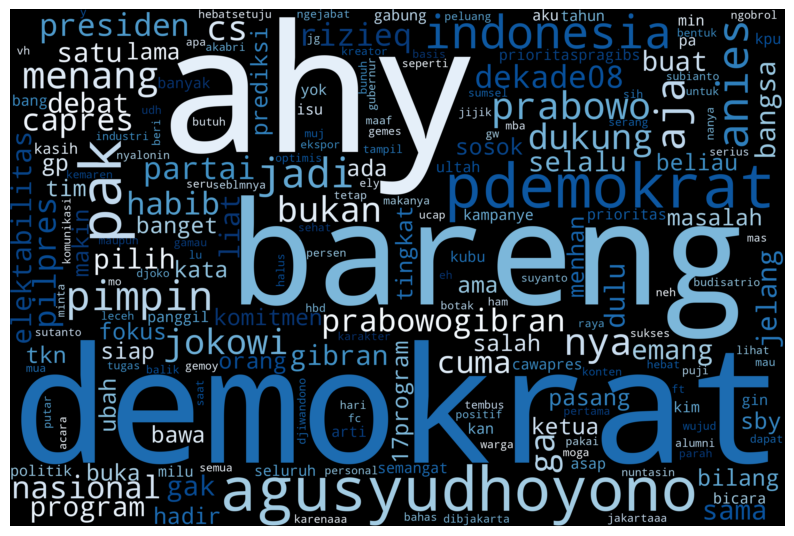

In [50]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap="Blues_r",
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

###Sentimen Ditribution Chart

In [51]:
import seaborn as sns

sns.set_theme()

labels = ['Positif','Negatif','Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels, counts, color=['#239947','#f72323','#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)
  ax.set_xlabel=('Sentimen')
  ax.set_ylabel=('Count')
  ax.set_title(title)

  plt.show()

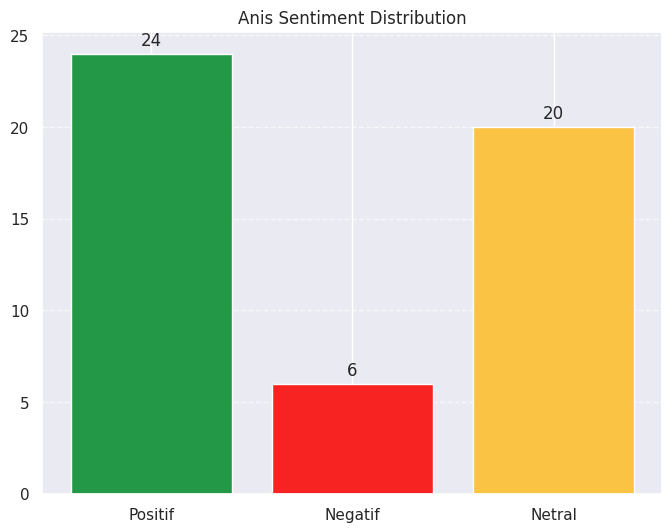

In [52]:
show_bar_chart(labels, counts,"Anis Sentiment Distribution")

#Naive Bayes Classifier

In [53]:
data

,full_text,tweet_english,klasifikasi
0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...,Positif
1,elektabilitas tembus 45 persen ahy menang satu...,electability penetrates 45 percent ahy wins on...,Positif
2,beri puji ahy pimpin hebat bangsa indonesia mu...,give praise ahy great leader of the Indonesian...,Positif
3,jokowi hebatsetuju lihat tampil debat 1 beliau...,jokowi hebats agreed to see the appearance of ...,Negatif
4,prabowo prediksi ahy jadi pimpin tingkat nasio...,prabowo predicts ahy to be the national level ...,Netral
5,acara hari seru banget sby djoko suyanto sutan...,very exciting day event sby djoko suyanto suta...,Positif
6,warga indonesia butuh sosok pimpin seperti mas...,indonesians need a pimpin figure like Mas Gibr...,Netral
7,demokrat sumsel siap menang pasang prabowogibr...,south Sumatra democrats are ready to win the 2...,Positif
8,emang parah jijik sih bunuh karakter leceh per...,"severe disgust, kill the character of personal...",Negatif
9,ketua tim komunikasi tkn prabowogibran budisat...,the head of the communication team tkn prabowo...,Negatif


### Removing the full_text feature

In [54]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

### Data Training

In [55]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
  if(n[1] == 'Positif'):
    set_positif.append(n)
  elif(n[1] == 'Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negaitif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
  train_set.append(n)

###Accuracy

In [56]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.72


###Labeling

In [57]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet, classifier=cl)

  if analysis.classify() == 'Positif':
    total_positif += 1
  elif analysis.classify() == 'Netral':
    total_netral += 1
  else:
    total_negatif += 1

  status.append(analysis.classify())
  total += 1


In [58]:
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 12
Netral = 34
Negatif = 4

Total Data : 50


In [59]:
status = pd.DataFrame({"Bayes Classification": status })
data['bayes_classification'] = status

##Visualisation

###Sentimen Ditribution Chart

In [60]:
import seaborn as sns

sns.set_theme()

labels = ['Positif','Negatif','Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels, counts, color=['#239947','#f72323','#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)
  ax.set_xlabel=('Sentimen')
  ax.set_ylabel=('Count')
  ax.set_title(title)

  plt.show()

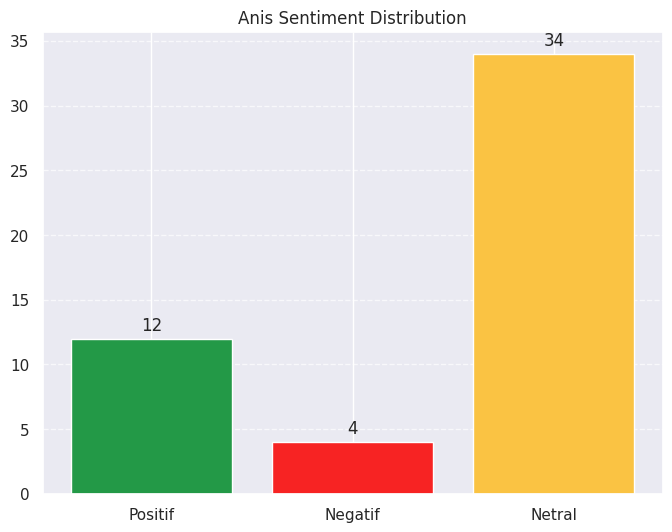

In [61]:
show_bar_chart(labels, counts,"Anis Sentiment Distribution")

#Evaluation

In [62]:
data.head()

,full_text,tweet_english,klasifikasi,bayes_classification
0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...,Positif,Positif
1,elektabilitas tembus 45 persen ahy menang satu...,electability penetrates 45 percent ahy wins on...,Positif,Netral
2,beri puji ahy pimpin hebat bangsa indonesia mu...,give praise ahy great leader of the Indonesian...,Positif,Positif
3,jokowi hebatsetuju lihat tampil debat 1 beliau...,jokowi hebats agreed to see the appearance of ...,Negatif,Negatif
4,prabowo prediksi ahy jadi pimpin tingkat nasio...,prabowo predicts ahy to be the national level ...,Netral,Netral


In [63]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
  if len(n) >=4:
    if n[2] != n[3]:
      print(f'Text: {n[0]}\nTextBlob: {n[2]}\nNaive Bayes Classifier: {n[3]} \n')
  else:
    print("Tuple does not have enough elements ")


Text: elektabilitas tembus 45 persen ahy menang satu putar mua agusyudhoyono pdemokrat demokrat bareng ahy
TextBlob: Positif
Naive Bayes Classifier: Netral 

Text: acara hari seru banget sby djoko suyanto sutanto alumni akabri 19701973 hadir semua dekade08
TextBlob: Positif
Naive Bayes Classifier: Netral 

Text: program bawa ubah positif industri nasional peluang ekspor makin buka 17program prioritaspragibs
TextBlob: Positif
Naive Bayes Classifier: Netral 

Text: hbd mba sehat sukses gemoy selalu satu neh min dukung dukung pak ultah kasih ucap jg y min
TextBlob: Positif
Naive Bayes Classifier: Netral 

Text: prabowo subianto dapat banyak dukung artis maupun konten kreator dekade08
TextBlob: Positif
Naive Bayes Classifier: Netral 

Text: basis lama elektabilitas makin solid jelang pilpres 2024 jl pdemokrat agusyudhoyono demokrat bareng ahy
TextBlob: Negatif
Naive Bayes Classifier: Netral 

Text: cawapres kim wewenang mutlak capres ahy demokrat usul khofifah cawapres wn pdemokrat agusyud